# Objective

Demonstrate six different possible metrics for the dirtiness of a flow cell:

- `image_name`: summing the image without filtering
- `sum_filtered1`: summing the image with a bandpass filter to enhance the speckles
- `sum_filtered2`: summing the image with two bandpass filters to remove the "ghosts"
- `sum_filtered2`: summing the binarized image without filtering
- `sum_filtered2`: summing the binarized image with a bandpass filter to enhance the speckles
- `sum_bin_filtered2`: summing the binarized image with two bandpass filters to remove the "ghosts"

In [44]:
from skimage.io import imread
from skimage.filters import difference_of_gaussians, threshold_otsu
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)
    return img[starty:starty+cropy,startx:startx+cropx]

In [48]:
cropx, cropy = 1448, 1448
data_dir = '2022-03-25 GB20106 flow cell background sample images'

In [4]:
image_name = 'background-20220302-193248-7.tif'

### Load the image

In [5]:
path = '%s/%s' % (data_dir, image_name)
image = imread(path)

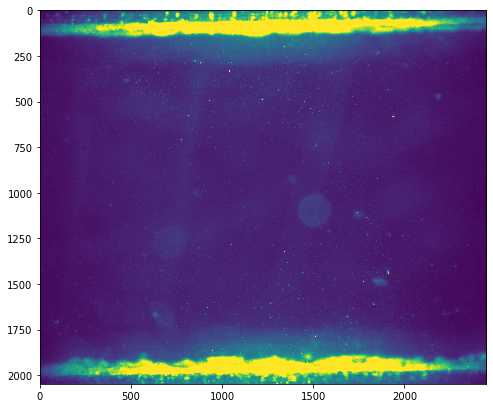

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()

### Crop the image down to the counting box

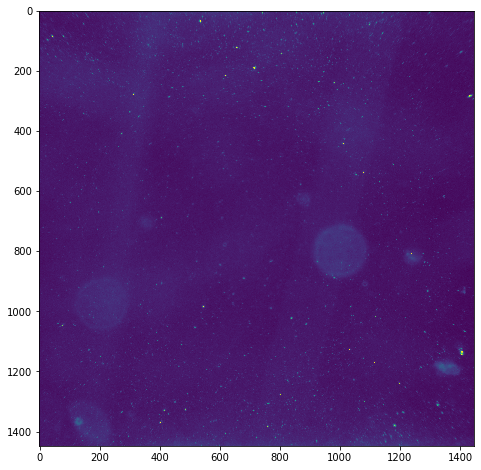

In [7]:
image_cropped = crop_center(image,cropx,cropy)
plt.figure(figsize=(8,8))
plt.imshow(image_cropped)
plt.show()

### Selectively extract the bright speckles
Do a difference-of-gaussians or some other form of highpass filter to selectively extract the bright speckles

filter1 to remove the streaking

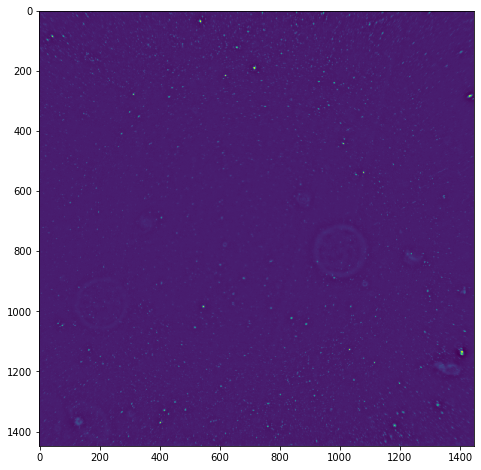

In [9]:
filtered1_image = difference_of_gaussians(image_cropped, 1, 12)
plt.figure(figsize=(8,8))
plt.imshow(filtered1_image)
plt.show()

filter2 to remove the "ghosts"

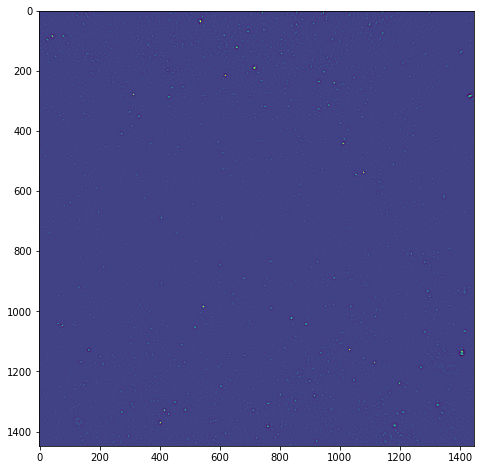

In [22]:
filtered2_image = difference_of_gaussians(filtered1_image, 1, 3)
plt.figure(figsize=(8,8))
plt.imshow(filtered2_image)
plt.show()

### Make a "dirtiness score"

#### Sum the brightness as is

In [26]:
sum_unfiltered = np.sum(image)
sum_filtered1 = np.sum(filtered1_image)
sum_filtered2 = np.sum(filtered2_image)

#### Binarize the image and add up the "hot" area 

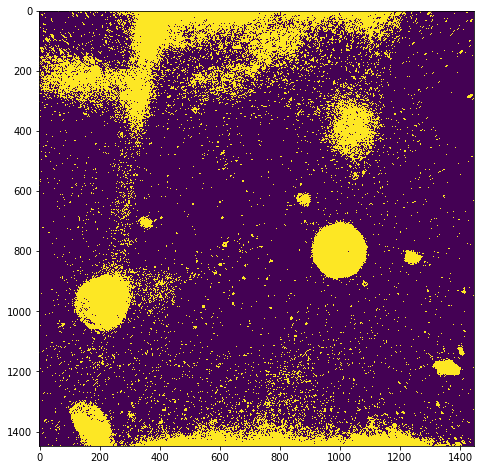

In [23]:
thresh = threshold_otsu(image_cropped)
binary = image_cropped > thresh
plt.figure(figsize=(8,8))
plt.imshow(binary)
plt.show()

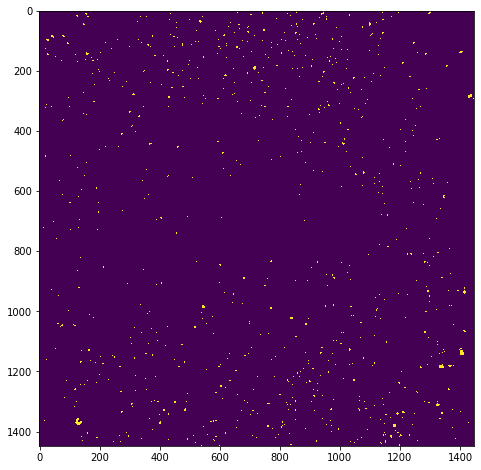

In [24]:
thresh = threshold_otsu(filtered1_image)
filtered1_binary = filtered1_image > thresh
plt.figure(figsize=(8,8))
plt.imshow(filtered1_binary)
plt.show()

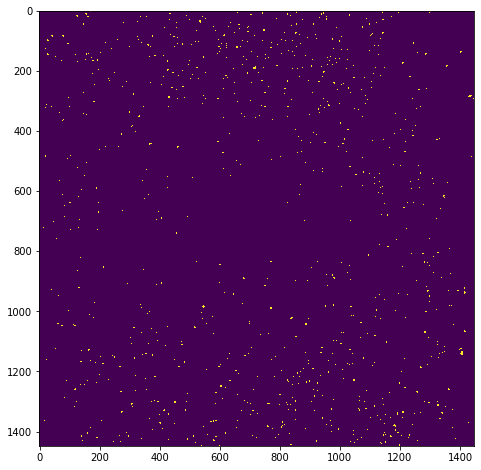

In [27]:
thresh = threshold_otsu(filtered2_image)
filtered2_binary = filtered2_image > thresh
plt.figure(figsize=(8,8))
plt.imshow(filtered2_binary)
plt.show()

In [40]:
bin_unfiltered = np.sum(binary)
bin_filtered1 = np.sum(filtered1_binary)
bin_filtered2 = np.sum(filtered2_binary)

In [42]:
sum_unfiltered, sum_filtered1, sum_filtered2

(77735213824, -82.44657772544929, -2.201049988402139)

In [43]:
bin_unfiltered, bin_filtered1, bin_filtered2

(379675, 41265, 13273)